In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color2hex
from sklearn.cluster import KMeans
import matplotlib.image as image

In [4]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('trump_tie_1.jpg')
img2 = cv2.imread('trump_tie_2.jpg')
img3 = cv2.imread('trump_tie_3.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

In [5]:
X1 = img1.reshape((-1,3))
X2 = img2.reshape((-1,3))
X3 = img3.reshape((-1,3))

color extraction

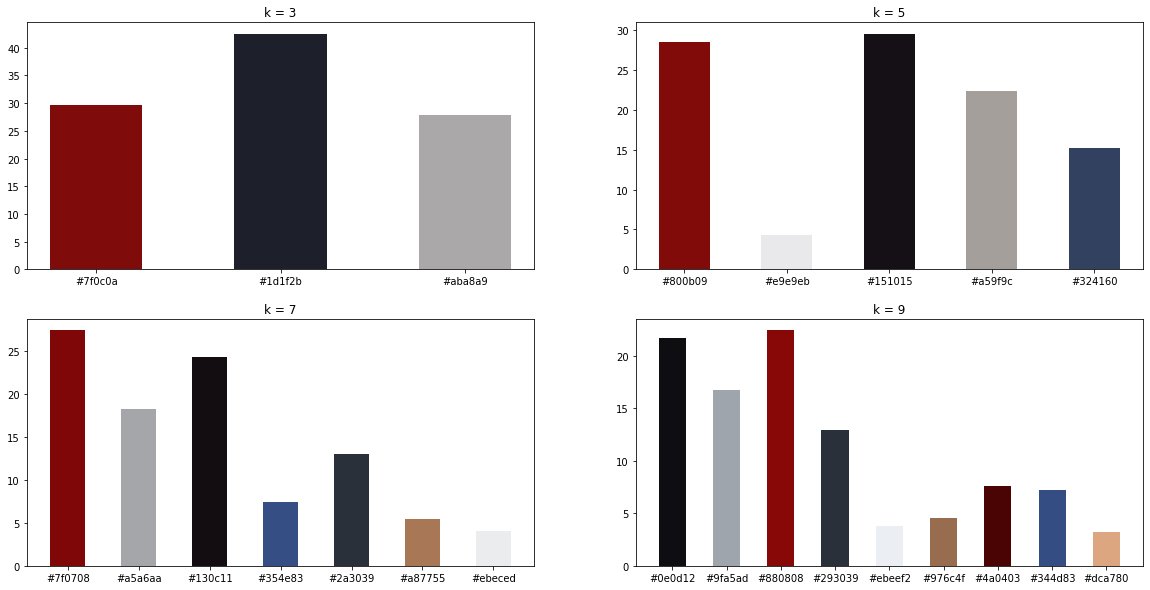

In [6]:
plt.figure(figsize=(20,10))
k=0
for i in [3,5,7,9]:
    km = KMeans(n_clusters=i)
    km.fit(X1)
    centers = km.cluster_centers_
    colors = []
    bars = []
    height=np.unique(km.labels_,return_counts=True)[1]
    height=height*100/sum(height)
    color = centers/255.
    for j in color:
        bars.append(color2hex.to_hex(j, keep_alpha=False))
    plt.subplot(2, 2, k + 1)
    k=k+1
    plt.title('k = {}'.format(i))
    plt.bar(bars, height, color=bars, width=0.5)
plt.show()


color segmentation

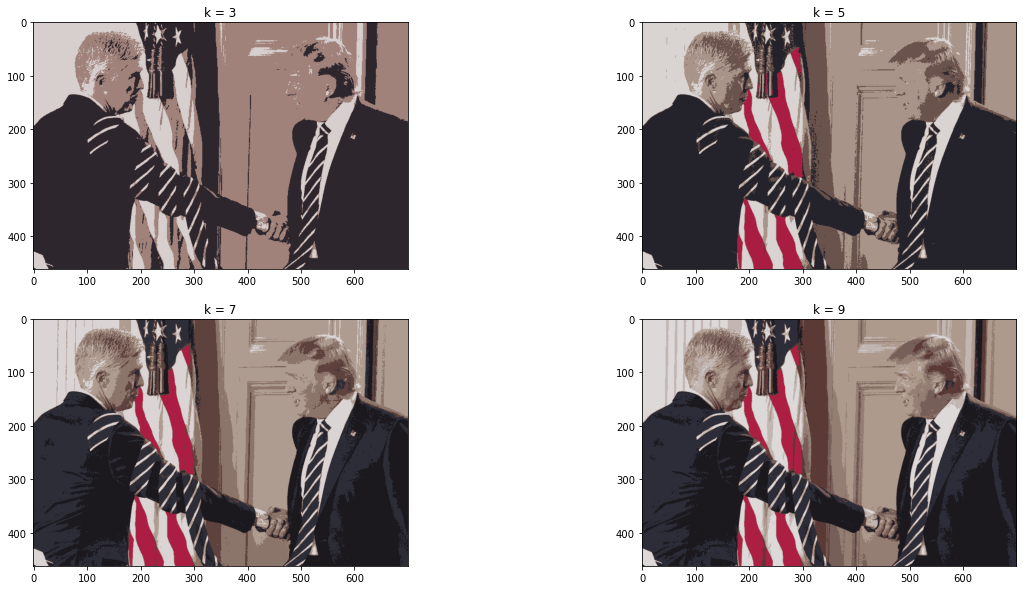

In [7]:
plt.figure(figsize=(20,10))
k=0
for i in [3,5,7,9]:
    km = KMeans(n_clusters=i)
    km.fit(X2)
    centers = km.cluster_centers_
    centers = np.array(centers,dtype='uint8')
    new_img = np.zeros((img2.shape[0]*img2.shape[1],3),dtype='uint8')
    for ix in range(new_img.shape[0]):
        new_img[ix] = centers[km.labels_[ix]]
    plt.subplot(2, 2, k + 1)
    k=k+1
    plt.title('k = {}'.format(i))
    new_img = new_img.reshape((img2.shape))
    plt.imshow(new_img)
plt.show()



color comparison

In [9]:
for i in [60,200,500,900]:
    k_colors = KMeans(n_clusters=i).fit(X3)
    image1 = k_colors.cluster_centers_[k_colors.labels_]
    image1 = np.reshape(image1, img3.shape)
    image1 = image1.astype('uint8')
    image.imsave('image{}.jpg'.format(i),image1,format='jpg')